### Analitica Computacional para la toma de decisiones

# Importar Librerias

In [2]:
import numpy as np
import pandas as pd

Se importan las librerías `numpy` como `np` y `pandas` como `pd` para su uso en el resto del cuaderno.

In [3]:
df = pd.read_csv(r'C:\Users\fmerc\OneDrive\Escritorio\Analitica Computacional\Tarea_1\BikePrices.csv')

Se lee e importa el archivo CSV como un DataFrame utilizando la función `read_csv` de la librería `pandas` (`pd`).

In [4]:
df.shape

(1061, 8)

Muestra la dimensión de la data frame

In [5]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


La función `head` muestra las primeras 5 filas con todas las columnas del DataFrame, comenzando con el índice cero, ya que Python utiliza indexación basada en cero.

In [6]:
df["Seller_Type"].unique()

array(['Individual', 'Dealer'], dtype=object)

La función `unique` en Python muestra los valores únicos de una columna, eliminando duplicados. Dado que la columna `Attrition_Flag` son 2 categorías, te devolverá solo los valores únicos.

In [7]:
df.groupby(["Seller_Type"]).count()

,Brand,Model,Selling_Price,Year,Owner,KM_Driven,Ex_Showroom_Price
Seller_Type,,,,,,,
Dealer,6,6,6,6,6,6,3
Individual,1055,1055,1055,1055,1055,1055,623


La función `groupby` agrupa por categoría y cuenta la cantidad de filas que tiene cada categoría en la columna `Attrition_flag`.

In [8]:
df["Seller_Type"].value_counts()

Seller_Type
Individual    1055
Dealer           6
Name: count, dtype: int64

La función `value_counts` muestra el número de observaciones por categoría en `Attrition_Flag`, asociando cada una con su respectiva frecuencia.

In [9]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


La función `describe` proporciona un análisis descriptivo de cada columna con atributos cuantitativos, mostrando el número de observaciones (`count`), el promedio (`mean`), la desviación estándar (`std`), el valor mínimo (`min`), los cuartiles del 25%, 50% y 75%, y el valor máximo (`max`) dentro de la columna.

In [10]:
counts = df.Seller_Type.value_counts()
perc_dealer = (counts.iloc[1] / (counts.iloc[0] + counts.iloc[1])) * 100
print(f'Dealer Rate = {perc_dealer:.1f}%')

Dealer Rate = 0.6%


La función calcula el porcentaje vendido por dealer sobre el total de clientes (la suma de `Dealer` y `Individual`), multiplicado por 100. Utiliza `iloc` para seleccionar valores específicos en el DataFrame `counts`(almacena el conteo por categoría de la columna `Selling_Type` utilizando la función `value_counts`), donde `Individual` está en la fila 1 y `Dealer` en la fila 0. Finalmente, imprime el valor calculado en `perc_dealer` junto con el texto "Dealer Rate", formateado como porcentaje.

In [11]:
# número de duplicados
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 6


Calcula el numero de duplicados que se encuentran en toda la data frame.dde igual manera imprimimos el resultado con la función `print`

In [12]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 435


La función `is_null()` identifica los valores nulos en cada celda del DataFrame, asignando un valor booleano: `True` para nulos (representado internamente como 1) y `False` para no nulos (representado como 0). Primero, se suman los valores nulos por columna, y luego se suman estas sumas para obtener el total de valores faltantes en todo el DataFrame. Finalmente, este total se imprime junto con un texto descriptivo usando `print`.

In [13]:
# Tipos de datos en el dataset
types = df.dtypes.value_counts()

print('Number of Features: %d'%(df.shape[1]))
print('Number of Customers: %d'%(df.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Features: 8
Number of Customers: 1061
Data Types and Frequency in Dataset:
object     4
int64      3
float64    1
Name: count, dtype: int64


Esta función cuenta y muestra la cantidad de columnas, filas y la frecuencia de cada tipo de dato en el DataFrame `df`.

### Pre - Porcesing

In [14]:
# Conversión de características
df['Seller_Type'] = df['Seller_Type'].map({'Individual': 1, 'Dealer': 0})

Esta función convierte los valores categóricos de la columnas `Seller_Type` en valores numéricos (1 y 0) en el DataFrame `df`.

In [15]:
catcols = df.select_dtypes(exclude = ['int64','float64']).columns
intcols = df.select_dtypes(include = ['int64']).columns
floatcols = df.select_dtypes(include = ['float64']).columns

# codificación 
df = pd.get_dummies(df, columns = catcols)
   
print('New Number of Features: %d'%(df.shape[1]))  

New Number of Features: 308


Esta función identifica las columnas categóricas, enteras y de punto flotante en `df`, aplica codificación one-hot a las categóricas, y luego imprime el nuevo número de columnas del DataFrame.

In [16]:
df

,Selling_Price,Year,Seller_Type,KM_Driven,Ex_Showroom_Price,Brand_Activa,Brand_Aprilia,Brand_BMW,Brand_Bajaj,Brand_Benelli,...,Model_Yamaha YBR 125,Model_Yamaha YZF R15 S,Model_Yamaha YZF R15 V3,Model_Yamaha YZF R15 [2011-2018],Model_Yamaha YZF R3,Model_Yo Style,Owner_1st owner,Owner_2nd owner,Owner_3rd owner,Owner_4th owner
0,30000,2017,1,8000,30490.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,18000,2017,1,35000,32000.0,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,20000,2011,1,10000,37675.0,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,25000,2010,1,43000,42859.0,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,24999,2012,1,35000,42859.0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,90000,2012,1,40000,NaN,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1057,20000,2010,1,17000,NaN,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1058,60000,2014,1,16000,NaN,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1059,40000,2009,1,50000,NaN,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


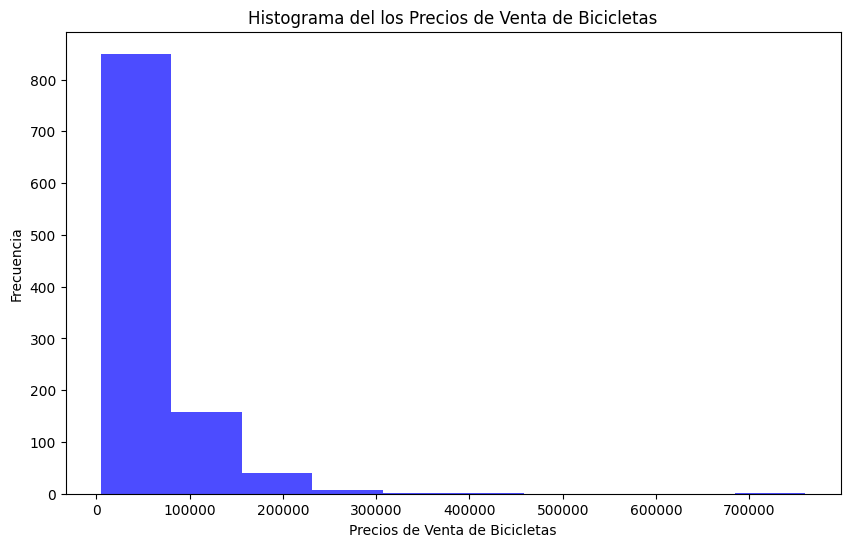

In [19]:
import matplotlib.pyplot as plt

# Histograma del 'Credit_Limit'
plt.figure(figsize=(10, 6))
plt.hist(df['Selling_Price'], bins=10, alpha=0.7, color='blue')  # Ajusta 'bins' según lo necesario
plt.xlabel('Precios de Venta de Bicicletas')
plt.ylabel('Frecuencia')
plt.title('Histograma del los Precios de Venta de Bicicletas')
plt.show()

Realice un histograma de precios con el fin de observar en que rango se precios se concentran mas las bicicletas que se encuentran en la base, y que despues serviria como de insumo para entender si otras variables categoricas tiene un impacto sobre esta